##  Here, I explore SVD and PCA with some code examples

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters for 2D gaussian 
mean = [3, 3]
cov = [[4, 1], [1, 0.5]]

In [3]:
x, y = np.random.multivariate_normal(mean, cov, 10000).T

(-4.848080974131281,
 11.363065248759762,
 -0.29963401634603176,
 6.292314343266666)

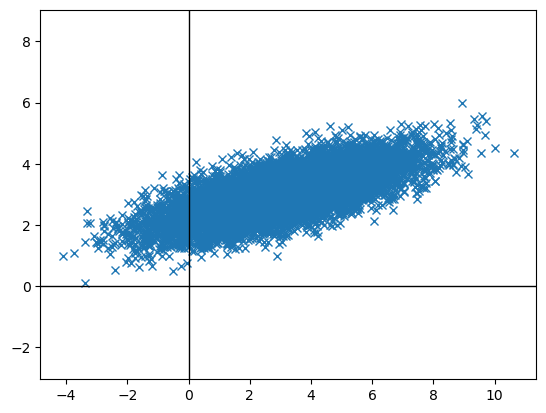

In [4]:
plt.plot(x, y, 'x')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')

In [64]:
## Try to retrieve the covariance matrix with the data points
# Construct design matrix
X = np.stack([x, y]).T      # 10,000 x 2 matrix - 10,000 entries, x and y are columns

# Get the mean rows:
mean_row = np.mean(X, axis=0)   # should be approx. (3, 3)
X_mean = np.tile(mean_row, (X.shape[0], 1))     # repeat mean row 10,000 times in axis 1
X_centered = X - X_mean     # center the (x,y) coordinates of X
print(X_mean)

[[3.00624528 3.01013012]
 [3.00624528 3.01013012]
 [3.00624528 3.01013012]
 ...
 [3.00624528 3.01013012]
 [3.00624528 3.01013012]
 [3.00624528 3.01013012]]


(-7.85432625417706, 8.356819968713982, -3.1928559567086316, 3.2766171715677053)

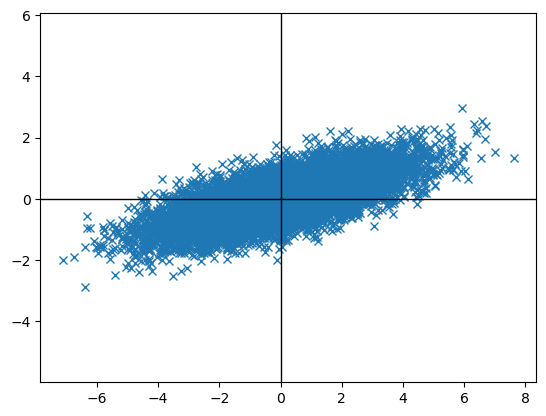

In [6]:
# Plot centered distribution
plt.plot(X_centered[:,0], X_centered[:,1], 'x')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')

In [7]:
# Calculate covariance/correlation matrix of centered design matirx
C = X_centered.T @ X_centered
print(C)

[[39965.20041485  9849.61591674]
 [ 9849.61591674  4964.86362318]]


In [58]:
# Perform SVD on matrix X_centered
U, S, V_T = np.linalg.svd(X_centered, full_matrices=False)

In [68]:
# Calculate the principal components
T = U @ np.diag(S)
print(T.shape)
print(S)
print(T)

(10000, 2)
[206.26835973  48.82036266]
[[-2.27282319 -0.54504715]
 [ 0.56857454 -0.28441046]
 [ 0.64664121 -0.00903832]
 ...
 [-1.63666515 -0.23585529]
 [-0.44488388 -0.44539964]
 [ 0.12239152  0.67833952]]


(-4.848080974131281,
 11.363065248759762,
 -0.29963401634603176,
 6.292314343266666)

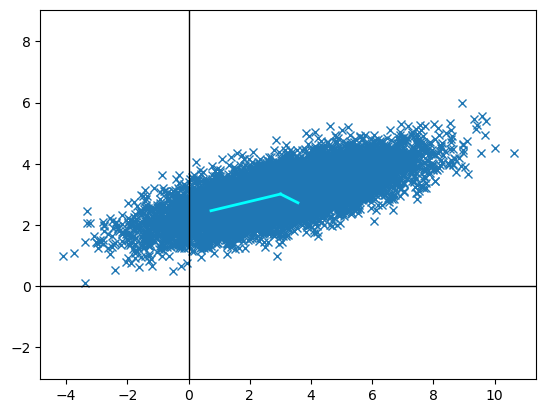

In [69]:
# Plot centered distribution
plt.plot(X[:,0], X[:,1], 'x')
plt.plot([mean_row[0], mean_row[0]+T[0, 0]],
         [mean_row[1], mean_row[1]+T[0, 1]], '-', color='cyan', linewidth=2)
plt.plot([mean_row[0], mean_row[0]+T[1, 0]],
         [mean_row[1], mean_row[1]+T[1, 1]], '-', color='cyan', linewidth=2)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')

### Generate the 2D gaussian only with random gaussian (x,y) points and a rotation matirx

(10000, 2)


(-4.410900954952864, 4.339653933019055, -4.2934119192914855, 4.6812462111395)

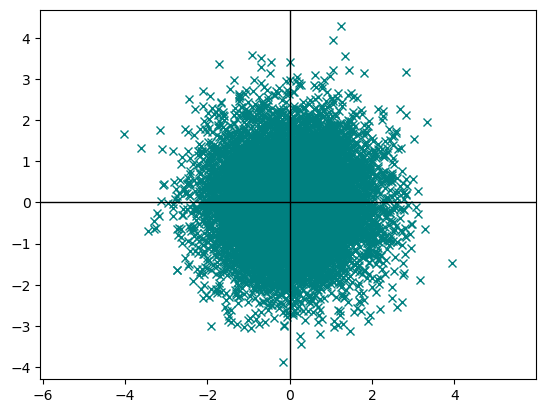

In [117]:
# Generate n points
n = 10000
points = np.random.randn(n, 2)
print(points.shape)

# Plot
# Plot 2D unit gaussian
plt.plot(points[:,0], points[:,1], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')

In [72]:
def get_rotation_matrix(theta):
    """Generates a rotation matrix with angle theta.

    Args:
        theta (float): Rotation angle.

    Returns:
        np.ndarray: Rotation matrix that rotates a vector with angle theta.
    """
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

(-5.448419046025567, 4.694465357023454, -6.073819229694952, 10.013610329853691)

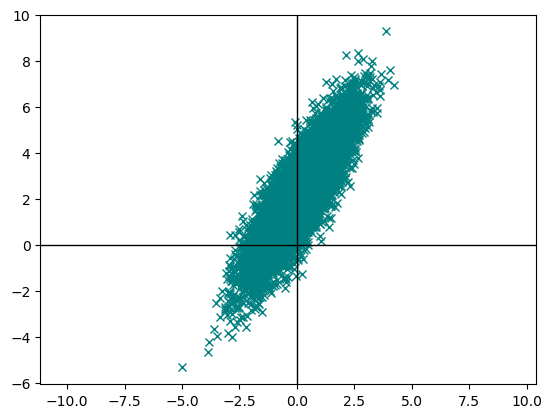

In [108]:
# Def the center and variance of the distribution
sigma = np.array([2., 0.5])     # variance in x and y direction
center = np.array([[2, 1]])       # center of distr.    
theta = -np.pi/3.                # rotation angle
R = get_rotation_matrix(theta)

## Transform the uniform normally distributed point cloud
# Introduce x,y variance, offset and rotation
X = (points @ np.diag(sigma) + np.ones((n,1)) @ center) @ R

# Plot
# Plot variated distribution
plt.plot(X[:,0], X[:,1], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')

In [115]:
# Get the mean rows
mean_row = np.mean(X, axis=0)
X_mean = np.tile(mean_row, (X.shape[0], 1))     # repeat mean row 10,000 times in axis 1
X_centered = X - X_mean                         # center the (x,y) coordinates of X
print(mean_row)

[0.12514548 2.21459176]


(-5.573564521545866, 4.569319881503154, -8.28841099456715, 7.799018564981493)

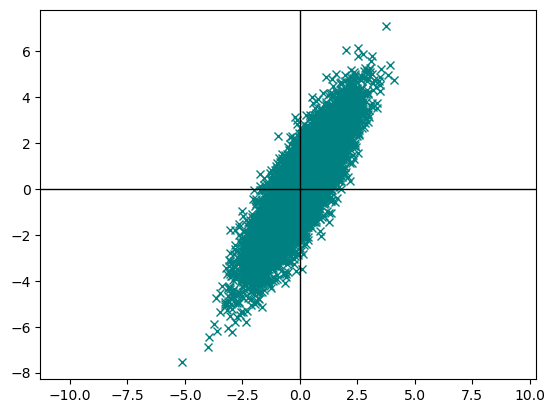

In [118]:
# Plot
# Plot centered distr.
plt.plot(X_centered[:,0], X_centered[:,1], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')